# Model Prep

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
df = pd.read_csv('datasets/train_eda_clean.csv')
df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,...,pool_area,fence,misc_val,mo_sold,yr_sold,sale_type,saleprice,natural_log,log_base2,log_base10
0,109,533352170,60,3,0.0,13517,0,3,4,4,...,0,0.0,0,3,2010,10,130500,11.779129,16.993690,5.115611
1,544,531379050,60,3,43.0,11492,0,3,4,4,...,0,0.0,0,4,2009,10,220000,12.301383,17.747144,5.342423
2,153,535304180,20,3,68.0,7922,0,4,4,4,...,0,0.0,0,1,2010,10,109000,11.599103,16.733969,5.037426
3,318,916386060,60,3,73.0,9802,0,4,4,4,...,0,0.0,0,4,2010,10,174000,12.066811,17.408728,5.240549
4,255,906425045,50,3,82.0,14235,0,3,4,4,...,0,0.0,0,3,2010,10,138500,11.838626,17.079526,5.141450


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1951 entries, 0 to 1950
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1951 non-null   int64  
 1   pid              1951 non-null   int64  
 2   ms_subclass      1951 non-null   int64  
 3   ms_zoning        1951 non-null   int64  
 4   lot_frontage     1951 non-null   float64
 5   lot_area         1951 non-null   int64  
 6   street           1951 non-null   int64  
 7   lot_shape        1951 non-null   int64  
 8   land_contour     1951 non-null   int64  
 9   utilities        1951 non-null   int64  
 10  lot_config       1951 non-null   int64  
 11  land_slope       1951 non-null   int64  
 12  neighborhood     1951 non-null   int64  
 13  condition_1      1951 non-null   int64  
 14  condition_2      1951 non-null   int64  
 15  bldg_type        1951 non-null   int64  
 16  house_style      1951 non-null   float64
 17  overall_qual  

### Create features matrix (X) & vector (y)
____


In [4]:
# select columns that have >0.50 correlation with 'saleprice'
X = df[['mas_vnr_area','totrms_abvgrd', 'fireplace_qu', 'year_remod/add', 'full_bath', 'garage_finish',
        'year_built', 'total_bsmt_sf', '1st_flr_sf', 'garage_cars', 'garage_area', 'bsmt_qual', 'kitchen_qual',
        'gr_liv_area', 'exter_qual', 'overall_qual']]
y = df['log_base10'] #change column from 'saleprice' to 'log_base10'

In [5]:
X.head()

,mas_vnr_area,totrms_abvgrd,fireplace_qu,year_remod/add,full_bath,garage_finish,year_built,total_bsmt_sf,1st_flr_sf,garage_cars,garage_area,bsmt_qual,kitchen_qual,gr_liv_area,exter_qual,overall_qual
0,289.0,6,0.0,2005,2,2.0,1976,725.0,725,2.0,475.0,3.0,4,1479,4,6
1,132.0,8,3.0,1997,2,2.0,1996,913.0,913,2.0,559.0,4.0,4,2122,4,7
2,0.0,5,0.0,2007,1,1.0,1953,1057.0,1057,1.0,246.0,3.0,4,1057,3,5
3,0.0,7,0.0,2007,2,3.0,2006,384.0,744,2.0,400.0,4.0,3,1444,3,5
4,0.0,6,0.0,1993,2,1.0,1900,676.0,831,2.0,484.0,2.0,3,1445,3,6


In [56]:
df_train = df[['mas_vnr_area','totrms_abvgrd', 'fireplace_qu', 'year_remod/add', 'full_bath', 'garage_finish',
        'year_built', 'total_bsmt_sf', '1st_flr_sf', 'garage_cars', 'garage_area', 'bsmt_qual', 'kitchen_qual',
        'gr_liv_area', 'exter_qual', 'overall_qual', 'saleprice', 'log_base10']]
df_train = pd.DataFrame(df_train)
df_train

,mas_vnr_area,totrms_abvgrd,fireplace_qu,year_remod/add,full_bath,garage_finish,year_built,total_bsmt_sf,1st_flr_sf,garage_cars,garage_area,bsmt_qual,kitchen_qual,gr_liv_area,exter_qual,overall_qual,saleprice,log_base10
0,289.0,6,0.0,2005,2,2.0,1976,725.0,725,2.0,475.0,3.0,4,1479,4,6,130500,5.115611
1,132.0,8,3.0,1997,2,2.0,1996,913.0,913,2.0,559.0,4.0,4,2122,4,7,220000,5.342423
2,0.0,5,0.0,2007,1,1.0,1953,1057.0,1057,1.0,246.0,3.0,4,1057,3,5,109000,5.037426
3,0.0,7,0.0,2007,2,3.0,2006,384.0,744,2.0,400.0,4.0,3,1444,3,5,174000,5.240549
4,0.0,6,0.0,1993,2,1.0,1900,676.0,831,2.0,484.0,2.0,3,1445,3,6,138500,5.141450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946,0.0,7,4.0,2007,2,3.0,2007,1884.0,1728,2.0,520.0,4.0,4,1728,4,8,298751,5.475309
1947,0.0,4,0.0,1950,1,1.0,1940,861.0,861,2.0,539.0,3.0,3,861,3,4,82500,4.916454
1948,0.0,9,3.0,1950,1,1.0,1928,896.0,1172,2.0,342.0,3.0,3,1913,3,6,177000,5.247973
1949,0.0,6,4.0,1956,1,1.0,1956,1200.0,1200,1.0,294.0,3.0,3,1200,3,4,144000,5.158362


<AxesSubplot:>

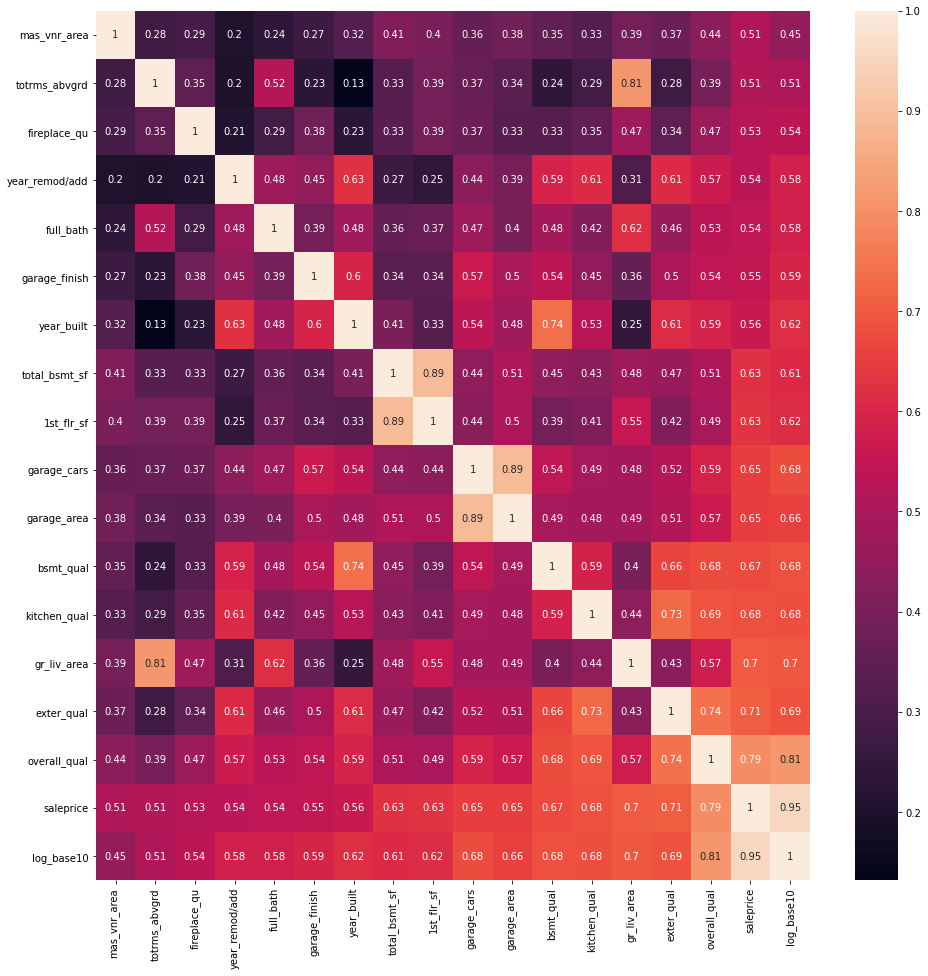

In [57]:
plt.figure(figsize=(16,16))
sns.heatmap(df_train.corr(), annot=True)

In [58]:
# drop garage_area (because it's high corrolation with garage_car)
df_train = df_train.drop(columns='garage_area')
df_train = df_train.drop(columns='mas_vnr_area')
df_train.columns
# We are not dropping 1st_flr_sf and/or total_bsmt_sf because in reality, I believe that they are two very different
# factors in buyer's perspective, despite the high correlation between these two (0.89)

Index(['totrms_abvgrd', 'fireplace_qu', 'year_remod/add', 'full_bath',
       'garage_finish', 'year_built', 'total_bsmt_sf', '1st_flr_sf',
       'garage_cars', 'bsmt_qual', 'kitchen_qual', 'gr_liv_area', 'exter_qual',
       'overall_qual', 'saleprice', 'log_base10'],
      dtype='object')

In [79]:
# create 2 PolynomialFeature garage_car*kitchen_qual and garage_cars*gr_liv_area
df_train['garage_cars*kitchen_qual'] = df_train['garage_cars'] * df_train['kitchen_qual']
df_train['garage_cars*gr_liv_area'] = df_train['garage_cars'] * df_train['gr_liv_area']
df_train['kitchen_qual*gr_liv_area'] = df_train['kitchen_qual'] * df_train['gr_liv_area']
df_train['fireplace_qu**2'] = df_train['fireplace_qu']**2
df_train.head()

,totrms_abvgrd,fireplace_qu,year_remod/add,full_bath,garage_finish,year_built,total_bsmt_sf,1st_flr_sf,garage_cars,bsmt_qual,...,gr_liv_area,exter_qual,overall_qual,saleprice,log_base10,garage_cars*kitchen_qual,garage_cars*gr_liv_area,kitchen_qual*gr_liv_area,fireplace_qu ** 2,fireplace_qu**2
0,6,0.0,2005,2,2.0,1976,725.0,725,2.0,3.0,...,1479,4,6,130500,5.115611,8.0,2958.0,5916,0.0,0.0
1,8,3.0,1997,2,2.0,1996,913.0,913,2.0,4.0,...,2122,4,7,220000,5.342423,8.0,4244.0,8488,9.0,9.0
2,5,0.0,2007,1,1.0,1953,1057.0,1057,1.0,3.0,...,1057,3,5,109000,5.037426,4.0,1057.0,4228,0.0,0.0
3,7,0.0,2007,2,3.0,2006,384.0,744,2.0,4.0,...,1444,3,5,174000,5.240549,6.0,2888.0,4332,0.0,0.0
4,6,0.0,1993,2,1.0,1900,676.0,831,2.0,2.0,...,1445,3,6,138500,5.141450,6.0,2890.0,4335,0.0,0.0


<AxesSubplot:>

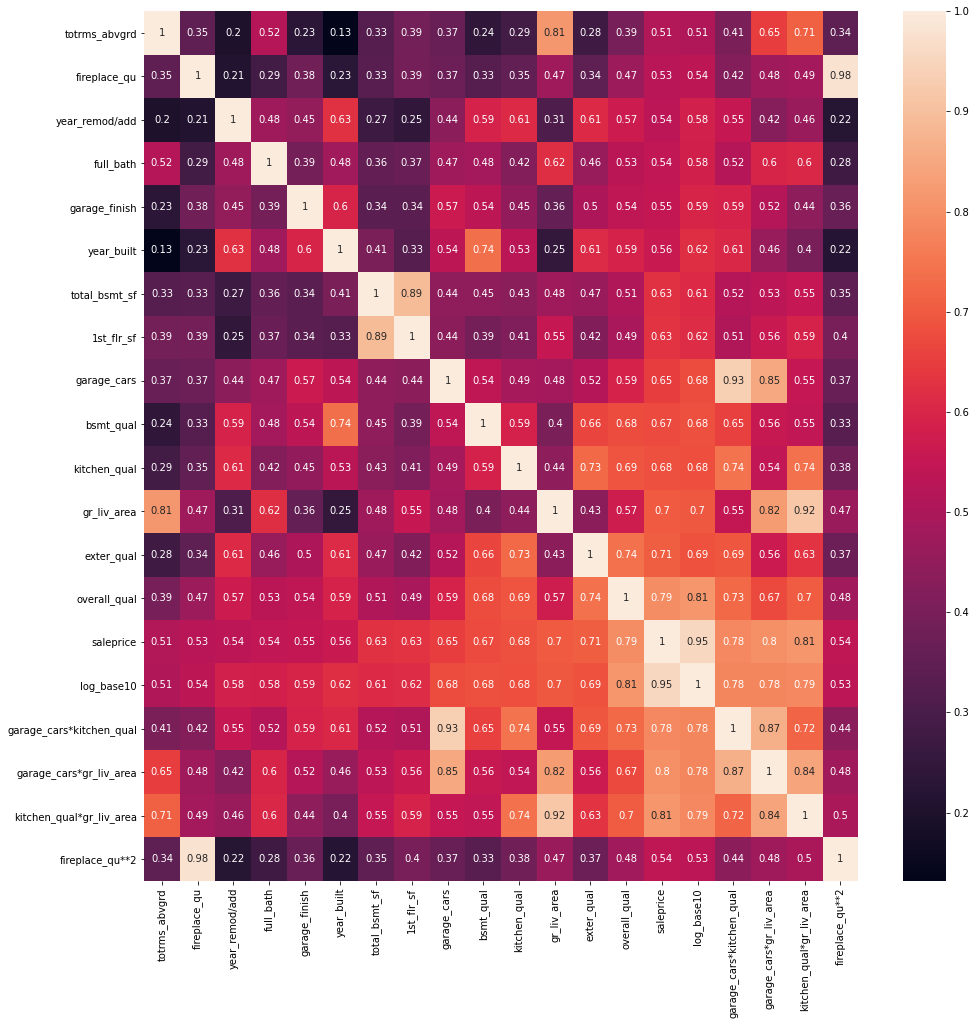

In [81]:
plt.figure(figsize=(16,16))
sns.heatmap(df_train.corr(), annot=True)

In [84]:
# re-create X and y with new features (including 2 polynomialfeature)
X = df_train[['totrms_abvgrd', 'fireplace_qu', 'year_remod/add', 'full_bath', 'garage_finish',
        'year_built', 'total_bsmt_sf', '1st_flr_sf', 'garage_cars', 'bsmt_qual', 'kitchen_qual',
        'gr_liv_area', 'exter_qual', 'overall_qual', 'garage_cars*kitchen_qual', 'garage_cars*gr_liv_area', 
              'kitchen_qual*gr_liv_area', 'fireplace_qu**2']]
y = df_train['log_base10'] #change 'saleprice' to 'log_base10'

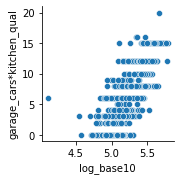

In [85]:
sns.pairplot(df_train, y_vars = ['garage_cars*kitchen_qual'], 
             x_vars=["log_base10"])

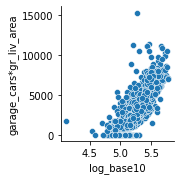

In [86]:
sns.pairplot(df_train, y_vars = ['garage_cars*gr_liv_area'], 
             x_vars=["log_base10"])

## Train/Test Split
____

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

In [88]:
X.shape

(1951, 18)

In [89]:
X_train.shape

(1560, 18)

In [90]:
X_test.shape

(391, 18)

In [91]:
y_train.shape

(1560,)

In [92]:
y_test.shape

(391,)

## Scaling
______
Scaling in training dataset

In [93]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

## Instantiate Model
____

In [94]:
lr = LinearRegression()

## Cross Validation
___

In [95]:
# first model: Linear Regression
cross_val_score(lr, X_train_sc, y_train, cv =5).mean()

0.7860941781764963

In [96]:
# Second model: Lasso
lasso = LassoCV(n_alphas=200)
cross_val_score(lasso, X_train_sc, y_train, cv=5).mean()

0.7879435203475483

In [97]:
# Third model: Ridge
ridge = RidgeCV(alphas=np.linspace(0.1, 10, 100))
cross_val_score(ridge, X_train_sc, y_train, cv=5).mean()

0.7913561329894296

In [98]:
# the best model among these three was Ridge initially, now it's lr

## Model Fitting and Evaluation
____

Let's try to fit both ridge and lr

In [99]:
ridge.fit(X_train_sc, y_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]))

In [100]:
lr.fit(X_train_sc, y_train)

LinearRegression()

In [101]:
pred = ridge.predict(X_test_sc)

In [102]:
pred_lr = lr.predict(X_test_sc)

In [103]:
pred

array([5.25494347, 5.22050135, 5.03961526, 5.06999034, 5.31104471,
       5.1290321 , 5.10785429, 5.38765502, 4.96323843, 5.0826741 ,
       5.2728758 , 5.63126994, 5.13030522, 5.08354739, 5.24797892,
       5.17548754, 5.29238464, 5.02815071, 4.99401807, 5.12124828,
       5.12556855, 5.24455802, 5.3548675 , 5.22918868, 5.16076361,
       5.25518347, 4.99817042, 5.10250992, 5.26543944, 5.46400188,
       5.40743979, 5.31629922, 5.02039449, 5.14119539, 5.41392013,
       5.33052919, 5.26022592, 5.07942675, 5.20652741, 5.20578205,
       5.1596607 , 5.14106425, 5.36885114, 5.37081477, 5.08143138,
       5.50830821, 5.07538712, 5.27445469, 5.0191295 , 5.18400861,
       5.19911505, 5.43225158, 5.04954993, 5.30456304, 5.06249558,
       5.39074619, 5.11497536, 5.51237314, 5.09225217, 5.19471664,
       5.12164596, 5.44597761, 5.33884936, 5.22053986, 5.11665994,
       5.45645922, 5.59061753, 5.05600175, 5.15846235, 5.14152935,
       5.35426418, 5.44778522, 5.26552144, 5.23826323, 5.48883

In [104]:
r2_score(y_test, pred)

0.8550396513293056

In [105]:
r2_score(y_test, pred_lr)

0.8536320628982996

In [106]:
# check R2 score for train data
print(ridge.score(X_train_sc, y_train)) #ridge train data
print(lr.score(X_train_sc, y_train)) #lr train data

0.8311102772448086
0.8322463503412458


In [107]:
# check R2 score for test data
print(ridge.score(X_test_sc, y_test)) #ridge test data
print(lr.score(X_test_sc, y_test)) #lr test data

0.8550396513293056
0.8536320628982996


In [108]:
# alternatively, we can also use k-fold cross validation
print(cross_val_score(ridge, X_train_sc, y_train, cv=5).mean())
print(cross_val_score(ridge, X_test_sc, y_test, cv=5).mean())

0.7913561329894296
0.8615549290256567


In [109]:
ridge.coef_

array([ 0.00365741,  0.03130851,  0.01657205, -0.00418613,  0.00816065,
        0.01792351,  0.00815986,  0.01516093, -0.0037087 ,  0.00762249,
        0.01989261,  0.06410693,  0.00121312,  0.04255572,  0.03383049,
        0.0005736 , -0.03785876, -0.01588955])

In [110]:
ridge.intercept_

5.227645251376629

<AxesSubplot:>

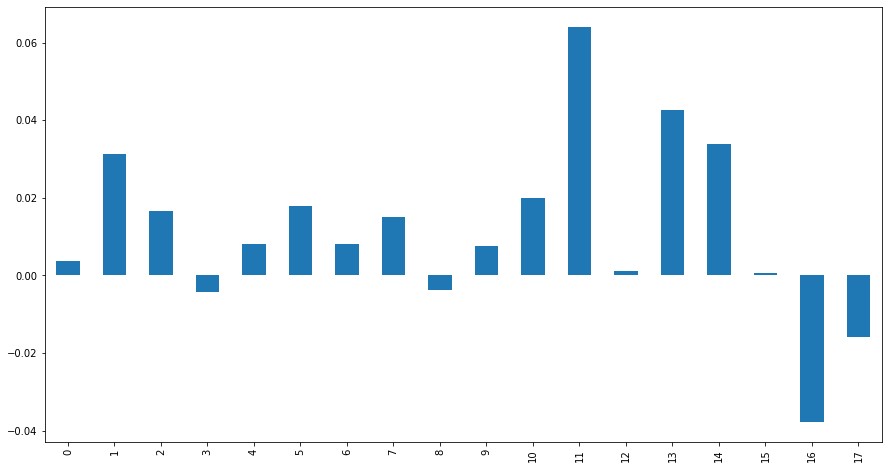

In [111]:
pd.Series(ridge.coef_).plot.bar(figsize=(15, 8))

## Test for df_test.csv
df_test.csv is the cleaned version of test.csv
_____

In [112]:
df_test = pd.read_csv('datasets/test_clean.csv')
df_test

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,fence,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,2,69.0,9142,0,4,4,4,...,60,112,0,0,0,0.0,0,4,2006,10
1,2718,905108090,90,3,0.0,9662,0,3,4,4,...,0,0,0,0,0,0.0,0,8,2006,10
2,2414,528218130,60,3,58.0,17104,0,3,4,4,...,24,0,0,0,0,0.0,0,9,2006,7
3,1989,902207150,30,2,60.0,8520,0,4,4,4,...,0,184,0,0,0,0.0,0,7,2007,10
4,625,535105100,20,3,0.0,9500,0,3,4,4,...,76,0,0,185,0,0.0,0,7,2009,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,1662,527377110,60,3,80.0,8000,0,4,4,4,...,96,0,0,0,0,0.0,0,11,2007,10
841,1234,535126140,60,3,90.0,14670,0,4,4,4,...,230,0,0,0,0,3.0,0,8,2008,10
842,1373,904100040,20,3,55.0,8250,0,4,4,4,...,63,0,0,0,0,0.0,0,8,2008,10
843,1672,527425140,20,3,60.0,9000,0,4,4,4,...,0,0,0,0,0,2.0,0,5,2007,10


In [113]:
df_test['garage_cars*kitchen_qual'] = df_test['garage_cars'] * df_test['kitchen_qual']
df_test['garage_cars*gr_liv_area'] = df_test['garage_cars'] * df_test['gr_liv_area']
df_test['kitchen_qual*gr_liv_area'] = df_test['kitchen_qual'] * df_test['gr_liv_area']
df_test['fireplace_qu**2'] = df_test['fireplace_qu']**2
df_test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,...,pool_area,fence,misc_val,mo_sold,yr_sold,sale_type,garage_cars*kitchen_qual,garage_cars*gr_liv_area,kitchen_qual*gr_liv_area,fireplace_qu**2
0,2658,902301120,190,2,69.0,9142,0,4,4,4,...,0,0.0,0,4,2006,10,2,1928,3856,0.0
1,2718,905108090,90,3,0.0,9662,0,3,4,4,...,0,0.0,0,8,2006,10,6,3934,5901,0.0
2,2414,528218130,60,3,58.0,17104,0,3,4,4,...,0,0.0,0,9,2006,7,8,2992,5984,16.0
3,1989,902207150,30,2,60.0,8520,0,4,4,4,...,0,0.0,0,7,2007,10,6,1936,2904,0.0
4,625,535105100,20,3,0.0,9500,0,3,4,4,...,0,0.0,0,7,2009,10,6,2788,4182,16.0


In [114]:
df_test2 = pd.DataFrame(df_test, columns=['totrms_abvgrd', 'fireplace_qu', 'year_remod/add', 
                                          'full_bath', 'garage_finish', 'year_built', 'total_bsmt_sf', 
                                          '1st_flr_sf', 'garage_cars', 'bsmt_qual', 'kitchen_qual',
                                          'gr_liv_area', 'exter_qual', 'overall_qual', 'garage_cars*kitchen_qual', 
                                          'garage_cars*gr_liv_area', 'kitchen_qual*gr_liv_area', 'fireplace_qu**2'])

In [115]:
df_test2

,totrms_abvgrd,fireplace_qu,year_remod/add,full_bath,garage_finish,year_built,total_bsmt_sf,1st_flr_sf,garage_cars,bsmt_qual,kitchen_qual,gr_liv_area,exter_qual,overall_qual,garage_cars*kitchen_qual,garage_cars*gr_liv_area,kitchen_qual*gr_liv_area,fireplace_qu**2
0,9,0.0,1950,2,1.0,1910,1020,908,1,2.0,2,1928,3,6,2,1928,3856,0.0
1,10,0.0,1977,2,3.0,1977,1967,1967,2,4.0,3,1967,3,5,6,3934,5901,0.0
2,7,4.0,2006,2,2.0,2006,654,664,2,4.0,4,1496,4,7,8,2992,5984,16.0
3,5,0.0,2006,1,1.0,1923,968,968,2,3.0,3,968,4,5,6,1936,2904,0.0
4,6,4.0,1963,1,2.0,1963,1394,1394,2,4.0,3,1394,3,6,6,2788,4182,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,8,3.0,1974,2,1.0,1974,1084,1084,2,3.0,3,1877,3,6,6,3754,5631,9.0
841,9,4.0,1999,2,2.0,1966,1104,1104,2,3.0,4,1988,4,6,8,3976,7952,16.0
842,5,3.0,1968,1,1.0,1968,952,1211,1,3.0,3,1211,3,5,3,1211,3633,9.0
843,5,0.0,1971,1,1.0,1971,864,864,2,3.0,3,864,3,4,6,1728,2592,0.0


In [116]:
df_test2.shape

(845, 18)

In [117]:
ss = StandardScaler()
df_test2_sc = ss.fit_transform(df_test2)
df_test2_sc = ss.transform(df_test2)

In [118]:
pre_test = ridge.predict(df_test2_sc)

In [119]:
pre_test

array([5.10107051, 5.27642411, 5.30791032, 5.09361129, 5.22849547,
       5.02013259, 5.06883522, 5.15947003, 5.28566499, 5.19452647,
       5.23300337, 5.12295663, 5.18883222, 5.46357135, 5.20251593,
       5.15310985, 5.06010385, 5.2755051 , 5.27160149, 5.16058758,
       5.06208669, 5.31354742, 5.15117585, 5.29694471, 5.05270268,
       5.13469001, 5.11359798, 5.16670676, 4.85585264, 5.01667331,
       5.02602151, 5.40659647, 5.21519438, 5.34812545, 5.27407671,
       5.1052386 , 5.11376574, 5.28510254, 5.21908897, 5.3555933 ,
       5.18992005, 5.16351454, 5.33639743, 5.07917153, 5.33311044,
       5.05666441, 5.09252999, 5.08356576, 5.04642229, 5.26007349,
       5.44278729, 5.1099999 , 5.03936503, 5.2013009 , 5.16145554,
       5.14958984, 5.21606178, 5.37798086, 5.48285145, 5.07426034,
       5.14594338, 5.23727568, 5.23847582, 5.49129861, 4.98492609,
       5.30554267, 4.96246659, 5.23872691, 4.97246216, 5.54552828,
       5.23550825, 5.28409261, 5.09107824, 5.29027291, 5.14798

In [120]:
df_test2['saleprice_pred'] = 10 ** ridge.predict(df_test2_sc)

In [121]:
df_test2.head()

,totrms_abvgrd,fireplace_qu,year_remod/add,full_bath,garage_finish,year_built,total_bsmt_sf,1st_flr_sf,garage_cars,bsmt_qual,kitchen_qual,gr_liv_area,exter_qual,overall_qual,garage_cars*kitchen_qual,garage_cars*gr_liv_area,kitchen_qual*gr_liv_area,fireplace_qu**2,saleprice_pred
0,9,0.0,1950,2,1.0,1910,1020,908,1,2.0,2,1928,3,6,2,1928,3856,0.0,126203.240279
1,10,0.0,1977,2,3.0,1977,1967,1967,2,4.0,3,1967,3,5,6,3934,5901,0.0,188983.595647
2,7,4.0,2006,2,2.0,2006,654,664,2,4.0,4,1496,4,7,8,2992,5984,16.0,203193.737021
3,5,0.0,2006,1,1.0,1923,968,968,2,3.0,3,968,4,5,6,1936,2904,0.0,124054.148674
4,6,4.0,1963,1,2.0,1963,1394,1394,2,4.0,3,1394,3,6,6,2788,4182,16.0,169237.058223


In [122]:
df_test2.to_csv('datasets/test_clean_final.csv', index=False)

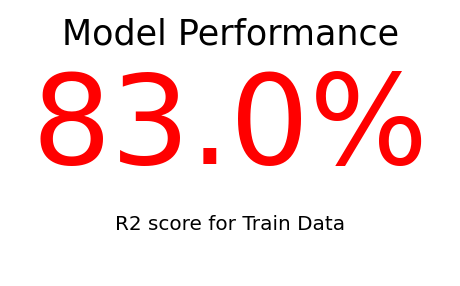

In [50]:
plt.figure(figsize=(8, 5))

plt.text(x = 0.5, 
        y = 0.9, 
        s = 'Model Performance',
        ha = 'center', 
        va = 'center',
        size = 35,
        alpha = 1)

plt.text(x = 0.5, 
        y = 0.55, 
        s =  str(round(ridge.score(X_train_sc, y_train), 2)*100) + '%',
        ha = 'center', 
        va = 'center',
         size = 125, 
         color = 'r',
        alpha = 1)

plt.text(x = 0.5, 
        y = 0.2, 
        s = 'R2 score for Train Data',
        ha = 'center', 
        va = 'center',
        size = 20, 
        alpha = 1)

plt.axis('off');

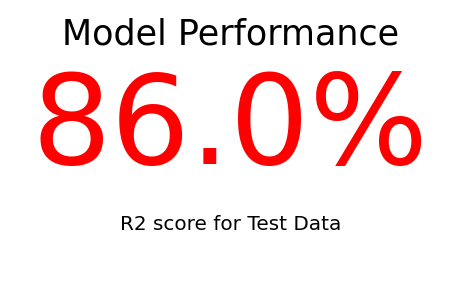

In [51]:
plt.figure(figsize=(8, 5))

plt.text(x = 0.5, 
        y = 0.9, 
        s = 'Model Performance',
        ha = 'center', 
        va = 'center',
        size = 35,
        alpha = 1)

plt.text(x = 0.5, 
        y = 0.55, 
        s =  str(round(ridge.score(X_test_sc, y_test), 2)*100) + '%',
        ha = 'center', 
        va = 'center',
         size = 125, 
         color = 'r',
        alpha = 1)

plt.text(x = 0.5, 
        y = 0.2, 
        s = 'R2 score for Test Data',
        ha = 'center', 
        va = 'center',
        size = 20, 
        alpha = 1)

plt.axis('off');

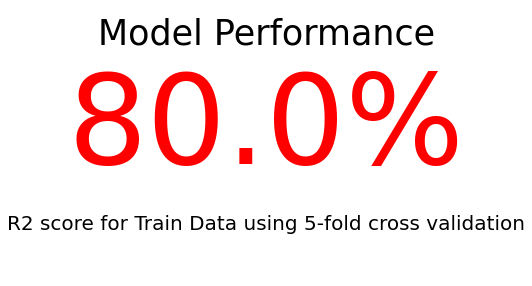

In [52]:
plt.figure(figsize=(8, 5))

plt.text(x = 0.5, 
        y = 0.9, 
        s = 'Model Performance',
        ha = 'center', 
        va = 'center',
        size = 35,
        alpha = 1)

plt.text(x = 0.5, 
        y = 0.55, 
        s =  str(round(cross_val_score(ridge, X_train_sc, y_train, cv=5).mean(), 2)*100) + '%',
        ha = 'center', 
        va = 'center',
         size = 125, 
         color = 'r',
        alpha = 1)

plt.text(x = 0.5, 
        y = 0.2, 
        s = 'R2 score for Train Data using 5-fold cross validation',
        ha = 'center', 
        va = 'center',
        size = 20, 
        alpha = 1)

plt.axis('off');

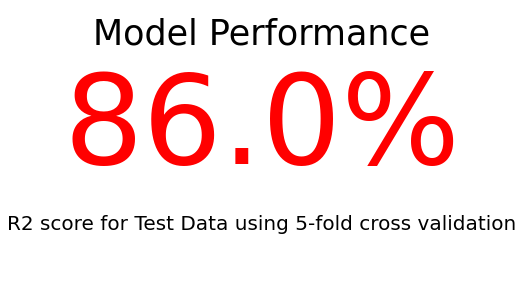

In [53]:
plt.figure(figsize=(8, 5))

plt.text(x = 0.5, 
        y = 0.9, 
        s = 'Model Performance',
        ha = 'center', 
        va = 'center',
        size = 35,
        alpha = 1)

plt.text(x = 0.5, 
        y = 0.55, 
        s =  str(round(cross_val_score(ridge, X_test_sc, y_test, cv=5).mean(), 2)*100) + '%',
        ha = 'center', 
        va = 'center',
         size = 125, 
         color = 'r',
        alpha = 1)

plt.text(x = 0.5, 
        y = 0.2, 
        s = 'R2 score for Test Data using 5-fold cross validation',
        ha = 'center', 
        va = 'center',
        size = 20, 
        alpha = 1)

plt.axis('off');